In [1]:
import pandas as pd

ddata = pd.read_csv("./data/ddata.txt", encoding="euc-kr", sep="\t", names=["num","speaker","contents","tags"])
mdata = pd.read_csv("./data/mdata.txt", encoding="euc-kr", sep="\t", names=["id","part","category","exptype","exp"])

ddata.head()

,num,speaker,contents,tags
0,0,<CO>,어서오세요. 코디봇입니다. 무엇을 도와드릴까요?,INTRO
1,1,<US>,처음 대학교 들어가는데 입을 옷 코디해주세요.,NaN
2,2,<CO>,신입생 코디에 어울리게 화사한 스웨터를 추천해드릴게요.,EXP_RES_SITUATION;EXP_RES_DESCRIPTION
3,3,<AC>,SW-009,NaN
4,4,<US>,이 옷에 어울리는 치마로 추천해주세요.,USER_SUCCESS


# 1. 전체 대화셋 개수 카운트

In [2]:
dial_num = 0

for i in range(1, len(ddata)):
    if ddata.loc[i, "num"] == 0:
        dial_num += 1
print("총 대화셋 수: ",dial_num)

총 대화셋 수:  7235


# 2. Mdata 합치기

## - Part 살려서 합치기

In [3]:
c_mdata = pd.DataFrame({"id":[0],'part':[None],"exp":[None]})
c_mdata.drop(0, axis=0, inplace=True)
c_mdata

,id,part,exp


In [4]:
id = ""
idx = 0
for i in range(len(mdata)):
    if id == mdata.loc[i, "id"]:
        c_mdata.loc[c_mdata.index[(c_mdata["id"] == id)].tolist().pop(),"exp"] = c_mdata.loc[c_mdata.index[(c_mdata["id"] == id)].tolist().pop(),"exp"] + " " + mdata.loc[i, "exp"]
        if (i + 1 < len(mdata)) and (id != mdata.loc[i+1, "id"]):
            c_mdata.loc[c_mdata["id"] == id, "part"] = mdata.loc[mdata["id"] == id, "part"]
    
    else:
        id = mdata.loc[i, "id"]
        c_mdata.loc[i, "id"] = id
        c_mdata.loc[i, "exp"] = mdata.loc[i, "exp"]

c_mdata.head()

,id,part,exp
0,BL-001,T,단추 여밈의 전체 오픈형 스탠드 칼라와 브이넥 네크라인의 결합스타일 손목까지 내려오...
20,BL-002,T,넓은 셔츠칼라 네크라인 앞중심에 반 오픈 끈여밈있는 스타일 드롭숄더 퍼프형 소매로 ...
38,BL-003,T,앞 중심에 단추 여밈 칼라가 없는 넓고 깊게 파인 브이넥 엉덩이 밑으로 내려오는 긴...
63,BL-004,T,"앞중심에 단추 여밈 칼라가 없는 라운드넥으로 골반 위에서 끝나는 짧은 기장 손목, ..."
84,BL-005,T,앞단추 여밈의 전체 오픈형 칼라가 없는 라운드넥크라인 엉덩이 위에서 끝나는 짧은 기...


In [5]:
c_mdata.loc[c_mdata.id == "VT-111 ", "part"] = "O"

In [6]:
for i in range(len(c_mdata)): # id 뒤에 공백 없애기
    c_mdata.iloc[i].id = c_mdata.iloc[i].id.strip()
    c_mdata.iloc[i].part = c_mdata.iloc[i].part.strip()

print(c_mdata.iloc[0].id)
c_mdata.reset_index(drop=True,inplace=True)
c_mdata.head()

BL-001


,id,part,exp
0,BL-001,T,단추 여밈의 전체 오픈형 스탠드 칼라와 브이넥 네크라인의 결합스타일 손목까지 내려오...
1,BL-002,T,넓은 셔츠칼라 네크라인 앞중심에 반 오픈 끈여밈있는 스타일 드롭숄더 퍼프형 소매로 ...
2,BL-003,T,앞 중심에 단추 여밈 칼라가 없는 넓고 깊게 파인 브이넥 엉덩이 밑으로 내려오는 긴...
3,BL-004,T,"앞중심에 단추 여밈 칼라가 없는 라운드넥으로 골반 위에서 끝나는 짧은 기장 손목, ..."
4,BL-005,T,앞단추 여밈의 전체 오픈형 칼라가 없는 라운드넥크라인 엉덩이 위에서 끝나는 짧은 기...


## 의상 별 개수 카운팅

In [7]:
c_mdata["id"][1][0:2]

'BL'

In [8]:
type_dic = {"BL":1}


for i in range(1,len(c_mdata)):
    cur = c_mdata["id"][i][0:2]

    if cur == c_mdata["id"][i-1][0:2]:
        type_dic[cur] += 1
    
    else:
        type_dic[cur] = 1

type_dic
    

{'BL': 148,
 'CD': 150,
 'CT': 310,
 'JK': 310,
 'JP': 280,
 'KN': 235,
 'OP': 176,
 'PT': 234,
 'SE': 130,
 'SH': 129,
 'SK': 230,
 'SW': 160,
 'VT': 111}

<BarContainer object of 13 artists>

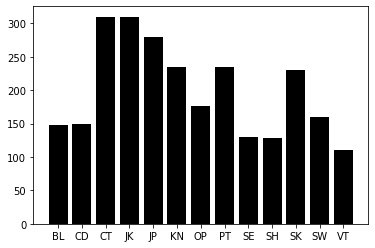

In [9]:
import matplotlib.pyplot as plt
plt.bar(type_dic.keys(),type_dic.values(), color='k')

In [10]:
c_mdata.loc[c_mdata["id"] == "BL-001"].part.values[0]

'T'

# 3. NaN, Null 값 확인

In [11]:
ddata.isnull().sum()

num             0
speaker         0
contents        0
tags        51927
dtype: int64

In [12]:
ddata.isna().sum()

num             0
speaker         0
contents        0
tags        51927
dtype: int64

In [13]:
ddata.fillna("", inplace=True)
ddata.isna().sum()

num         0
speaker     0
contents    0
tags        0
dtype: int64

In [14]:
mdata.isnull().sum()

id          0
part        0
category    0
exptype     0
exp         0
dtype: int64

In [15]:
c_mdata.isnull().sum()

id      0
part    0
exp     0
dtype: int64

# 4. 추천 성공 의상 아이디 종류 및 빈도 카운트 

## 한 번에 추천해도 실패하면 전부 실패로 달기

In [16]:
c_data = pd.DataFrame({"contents":[None], "id":["xx-xxx"]})
c_data.drop(0,axis=0,inplace=True)
c_data.head()

,contents,id


<코드 동작 원리>
<br>

대화문 하나씩 받아온 다음
- AC 태그 문장이면 일단 의상 변수에 저장,
- user_success 태그 문장이면

   - 변수에 저장된 의상이 하나면

      - 바로 대화문 변수랑 의상 변수 및 의상 메타데이터 합쳐서 저장 -> 레이블(id 컬럼에 저장)은 의상 코드가 됨

   - 변수에 저장된 의상의 여러 개면

      - 의상을 하나의 코드 단위로 쪼개서 대화문 변수랑 의상 메타데이터 합쳐서 저장
      
-  둘 다 아니고 일반 대화문이면 대화문 변수에 저장

In [17]:
dial = ddata.loc[0, "contents"].strip()
ac = ""

for i in range(1,len(ddata)):
    cur_sen = ddata.loc[i,"contents"].strip()

    if ddata.loc[i, "num"] > ddata.loc[i-1, "num"]: # 이전 대화셋에 포함된 문장인지 확인
        
        if ddata.loc[i,"speaker"] == "<AC>": # case 1. 의상 아이디가 나온 경우
            ac = cur_sen # 의상 아이디 저장
        

        elif "USER_SUCCESS" in ddata.loc[i,"tags"]: # case 2. 의상 추천 성공한 USER_SUCCESS 태그가 나온 경우
            dial = dial + " " + cur_sen
            if len(ac) < 7: # 의상을 하나만 추천한 경우
                c_data.loc[i, "contents"] =  dial + " " + c_mdata.loc[c_mdata.id == ac].exp.values[0]
                c_data.loc[i, "id"] = ac

            else: # 의상을 한 번에 여러 개 추천한 경우
                idx_cnt = 0
                for one_ac in ac.split():
                    c_data.loc[i + idx_cnt, "contents"] =  dial + " " + c_mdata.loc[c_mdata.id == one_ac].exp.values[0]
                    c_data.loc[i + idx_cnt, "id"] = one_ac
                    idx_cnt += 1

        else: # case 3. 그냥 대화문인 경우
            dial = dial + " " + cur_sen
    
    else: #새로운 대화셋 시작이면 초기화
        dial = cur_sen
        ac = ""
        ac_part = ""


In [18]:
print("전체 데이터 수: ", len(c_data))
c_data.head()

전체 데이터 수:  40718


,contents,id
4,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SW-009
13,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SK-053
18,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,CT-019
23,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SE-039
27,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,CT-019


In [19]:
c_data.reset_index(drop=True ,inplace=True)
c_data.head()

,contents,id
0,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SW-009
1,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SK-053
2,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,CT-019
3,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SE-039
4,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,CT-019


In [20]:
c_data.loc[0].contents

'어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코디해주세요. 신입생 코디에 어울리게 화사한 스웨터를 추천해드릴게요. 이 옷에 어울리는 치마로 추천해주세요. 라운드 네크라인 여밈이 없는 풀오버 스타일 전체 케이블 조직 드롭숄더 슬리브 손등까지 오는 길이의 소매 몸에 적당히 맞는 품 엉덩이를 살짝 덮는 길이 네크라인, 소매 끝, 밑단에 고무단 처리 레이온52%,나일론20%,폴리에스터28% 꽈배기 조직, 플레인 조직이 섞여 있는 형태 드라이 크리닝 단색의 라임색 브라이트톤(고명도 고채도)의 옐로우 그린 산뜻하고 발랄한 느낌 기본의 단정한 편안한 산뜻한 발랄한 경쾌한 따뜻한 데일리룩 캠퍼스룩'

## 만약 CT, SW, SK 등 코드만 맞추는 거라면 뒤에 숫자는 필요 없음 (어떤 부위 의상인지만 알면 됨)

In [21]:
trainset = c_data.copy()
trainset

,contents,id
0,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SW-009
1,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SK-053
2,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,CT-019
3,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SE-039
4,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,CT-019
...,...,...
40713,안녕하세요. 코디봇입니다. 무엇을 도와드릴까요? 꽃축제에 가족들이랑 가려고 하는데 ...,OP-051
40714,안녕하세요. 코디봇입니다. 무엇을 도와드릴까요? 꽃축제에 가족들이랑 가려고 하는데 ...,CT-022
40715,안녕하세요. 코디봇입니다. 무엇을 도와드릴까요? 꽃축제에 가족들이랑 가려고 하는데 ...,CT-022
40716,안녕하세요. 코디봇입니다. 무엇을 도와드릴까요? 꽃축제에 가족들이랑 가려고 하는데 ...,SE-080


In [22]:
for i in range(len(trainset)):
    trainset["id"][i] = trainset["id"][i][0:2]

trainset

,contents,id
0,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SW
1,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SK
2,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,CT
3,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SE
4,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,CT
...,...,...
40713,안녕하세요. 코디봇입니다. 무엇을 도와드릴까요? 꽃축제에 가족들이랑 가려고 하는데 ...,OP
40714,안녕하세요. 코디봇입니다. 무엇을 도와드릴까요? 꽃축제에 가족들이랑 가려고 하는데 ...,CT
40715,안녕하세요. 코디봇입니다. 무엇을 도와드릴까요? 꽃축제에 가족들이랑 가려고 하는데 ...,CT
40716,안녕하세요. 코디봇입니다. 무엇을 도와드릴까요? 꽃축제에 가족들이랑 가려고 하는데 ...,SE


In [23]:
trainset["contents"] = trainset["contents"].str.replace("[^A-Za-z0-9ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/tmp/ipykernel_3762/891733513.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  trainset["contents"] = trainset["contents"].str.replace("[^A-Za-z0-9ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [24]:
trainset["contents"][5]

'어서오세요 코디봇입니다 무엇을 도와드릴까요 처음 대학교 들어가는데 입을 옷 코디해주세요 신입생 코디에 어울리게 화사한 스웨터를 추천해드릴게요 이 옷에 어울리는 치마로 추천해주세요 고객님의 키 사이즈에 맞추면 이런 옷도 잘 어울리실 것 같은데 어떠신가요 제가 키가 작아서 짧은 치마로 추천해주세요 상의 색상과도 매칭이 잘 어울리는 짧은 치마입니다 어두운 계열은 없나요 언밸런스한 컷팅으로 세련미를 돋보이게 하는 치마인데 마음에 드시나요 나쁘지 않네요 외투도 추천해주시겠어요 요즘 계절에는 가디건이나 자켓을 걸치기에 좋은데 특정 종류로 원하는 게 있으신가요 트렌치코트 종류로 추천해주세요 이너 색상과 무난하게 잘 어울릴 트렌치코트입니다 신발도 추천해주세요 운동화나 구두 중 어떤 걸 선호하시나요 운동화로 추천해주세요 어떤 스타일과도 무난하게 잘 어울리는 기본아이템입니다 맘에 드네요 전체 코디샷 볼 수 있나요 네 지금까지 제안해드린 아이템으로 전체 코디샷을 제안해드립니다 마음에 드시나요 네 마음에 드네요 감사합니다 라운드 네크라인 여밈이 없는 풀오버 스타일 전체 케이블 조직 드롭숄더 슬리브 손등까지 오는 길이의 소매 몸에 적당히 맞는 품 엉덩이를 살짝 덮는 길이 네크라인 소매 끝 밑단에 고무단 처리 레이온52나일론20폴리에스터28 꽈배기 조직 플레인 조직이 섞여 있는 형태 드라이 크리닝 단색의 라임색 브라이트톤고명도 고채도의 옐로우 그린 산뜻하고 발랄한 느낌 기본의 단정한 편안한 산뜻한 발랄한 경쾌한 따뜻한 데일리룩 캠퍼스룩'

In [25]:
from collections import Counter
temp = trainset["id"].tolist()
type_count = dict(Counter(temp))
type_count

{'SW': 2076,
 'SK': 2937,
 'CT': 2708,
 'SE': 10298,
 'PT': 6473,
 'JP': 2258,
 'CD': 1792,
 'JK': 2455,
 'KN': 3532,
 'OP': 1987,
 'BL': 2374,
 'VT': 358,
 'SH': 1470}

<BarContainer object of 13 artists>

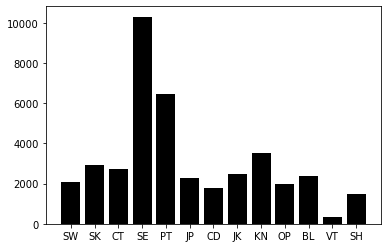

In [26]:
import matplotlib.pyplot as plt
plt.bar(type_count.keys(),type_count.values(), color='k')

# 5. 형태소 분석

## Mecab만 사용

In [27]:
from konlpy.tag import Mecab
mecab = Mecab()

In [28]:
mecab.morphs(trainset["contents"][0])

['어서',
 '오',
 '세요',
 '코디',
 '봇',
 '입니다',
 '무엇',
 '을',
 '도와',
 '드릴까요',
 '처음',
 '대학교',
 '들어가',
 '는',
 '데',
 '입',
 '을',
 '옷',
 '코디',
 '해',
 '주',
 '세요',
 '신입',
 '생',
 '코디',
 '에',
 '어울리',
 '게',
 '화사',
 '한',
 '스웨터',
 '를',
 '추천',
 '해',
 '드릴게요',
 '이',
 '옷',
 '에',
 '어울리',
 '는',
 '치마',
 '로',
 '추천',
 '해',
 '주',
 '세요',
 '라운드',
 '네크라인',
 '여',
 '밈',
 '이',
 '없',
 '는',
 '풀오버',
 '스타일',
 '전체',
 '케이블',
 '조직',
 '드롭',
 '숄더',
 '슬리브',
 '손등',
 '까지',
 '오',
 '는',
 '길이',
 '의',
 '소매',
 '몸',
 '에',
 '적당히',
 '맞',
 '는',
 '품',
 '엉덩이',
 '를',
 '살짝',
 '덮',
 '는',
 '길',
 '이',
 '네크라인',
 '소매',
 '끝',
 '밑단',
 '에',
 '고무단',
 '처리',
 '레이온',
 '52',
 '나일론',
 '20',
 '폴리에스터',
 '28',
 '꽈배기',
 '조직',
 '플레인',
 '조직',
 '이',
 '섞여',
 '있',
 '는',
 '형태',
 '드라이',
 '크리',
 '닝',
 '단색',
 '의',
 '라임색',
 '브라이트',
 '톤',
 '고명',
 '도',
 '고채',
 '도',
 '의',
 '옐로우',
 '그린',
 '산뜻',
 '하',
 '고',
 '발랄',
 '한',
 '느낌',
 '기본',
 '의',
 '단정',
 '한',
 '편안',
 '한',
 '산뜻',
 '한',
 '발랄',
 '한',
 '경쾌',
 '한',
 '따뜻',
 '한',
 '데일리',
 '룩',
 '캠퍼스',
 '룩']

In [29]:
x_data = []
for i in range(len(trainset)):
    x_data.append(mecab.morphs(trainset["contents"][i]))

x_data[0]

['어서',
 '오',
 '세요',
 '코디',
 '봇',
 '입니다',
 '무엇',
 '을',
 '도와',
 '드릴까요',
 '처음',
 '대학교',
 '들어가',
 '는',
 '데',
 '입',
 '을',
 '옷',
 '코디',
 '해',
 '주',
 '세요',
 '신입',
 '생',
 '코디',
 '에',
 '어울리',
 '게',
 '화사',
 '한',
 '스웨터',
 '를',
 '추천',
 '해',
 '드릴게요',
 '이',
 '옷',
 '에',
 '어울리',
 '는',
 '치마',
 '로',
 '추천',
 '해',
 '주',
 '세요',
 '라운드',
 '네크라인',
 '여',
 '밈',
 '이',
 '없',
 '는',
 '풀오버',
 '스타일',
 '전체',
 '케이블',
 '조직',
 '드롭',
 '숄더',
 '슬리브',
 '손등',
 '까지',
 '오',
 '는',
 '길이',
 '의',
 '소매',
 '몸',
 '에',
 '적당히',
 '맞',
 '는',
 '품',
 '엉덩이',
 '를',
 '살짝',
 '덮',
 '는',
 '길',
 '이',
 '네크라인',
 '소매',
 '끝',
 '밑단',
 '에',
 '고무단',
 '처리',
 '레이온',
 '52',
 '나일론',
 '20',
 '폴리에스터',
 '28',
 '꽈배기',
 '조직',
 '플레인',
 '조직',
 '이',
 '섞여',
 '있',
 '는',
 '형태',
 '드라이',
 '크리',
 '닝',
 '단색',
 '의',
 '라임색',
 '브라이트',
 '톤',
 '고명',
 '도',
 '고채',
 '도',
 '의',
 '옐로우',
 '그린',
 '산뜻',
 '하',
 '고',
 '발랄',
 '한',
 '느낌',
 '기본',
 '의',
 '단정',
 '한',
 '편안',
 '한',
 '산뜻',
 '한',
 '발랄',
 '한',
 '경쾌',
 '한',
 '따뜻',
 '한',
 '데일리',
 '룩',
 '캠퍼스',
 '룩']

In [30]:
stopwords = []
with open('./data/불용어사전.txt', mode='rt', encoding='utf-8') as f:
    for word in f.readlines():
        word = word.strip()
        stopwords.append(word)
stopwords[0:2]

['어찌됐든', '그위에']

In [31]:
X_data = []
for sentence in x_data: #문장 하나 가져오고 단어 단위로 쪼개기
    temp_X = [word for word in sentence if not word in stopwords] # 불용어 제거
    X_data.append(temp_X)
X_data[0]

['어서',
 '세요',
 '코디',
 '봇',
 '입니다',
 '도와',
 '드릴까요',
 '처음',
 '대학교',
 '들어가',
 '데',
 '입',
 '옷',
 '코디',
 '주',
 '세요',
 '신입',
 '생',
 '코디',
 '어울리',
 '게',
 '화사',
 '스웨터',
 '추천',
 '드릴게요',
 '옷',
 '어울리',
 '치마',
 '추천',
 '주',
 '세요',
 '라운드',
 '네크라인',
 '밈',
 '풀오버',
 '스타일',
 '전체',
 '케이블',
 '조직',
 '드롭',
 '숄더',
 '슬리브',
 '손등',
 '길이',
 '몸',
 '적당히',
 '맞',
 '품',
 '엉덩이',
 '살짝',
 '덮',
 '길',
 '네크라인',
 '끝',
 '밑단',
 '고무단',
 '처리',
 '레이온',
 '52',
 '나일론',
 '20',
 '폴리에스터',
 '28',
 '꽈배기',
 '조직',
 '플레인',
 '조직',
 '섞여',
 '있',
 '형태',
 '드라이',
 '크리',
 '닝',
 '단색',
 '라임색',
 '브라이트',
 '톤',
 '고명',
 '도',
 '고채',
 '도',
 '옐로우',
 '그린',
 '산뜻',
 '고',
 '발랄',
 '느낌',
 '기본',
 '단정',
 '편안',
 '산뜻',
 '발랄',
 '경쾌',
 '따뜻',
 '데일리',
 '룩',
 '캠퍼스',
 '룩']

## 1. 임베딩 레이어 활용

### 정수 인코딩

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)

In [33]:
threshold = 4
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 7101
등장 빈도가 3번 이하인 희귀 단어의 수: 494
단어 집합에서 희귀 단어의 비율: 6.956766652584142
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.01558439504875407


In [34]:
vocab_size = total_cnt - rare_cnt + 1 # tokenizer 함수에 들어 갈 때 영향줘서 1 추가 해야 됨
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 6608


In [35]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_data)
X_data = tokenizer.texts_to_sequences(X_data)

In [36]:
X_data[1]

[101,
 1,
 3,
 16,
 5,
 28,
 15,
 1536,
 1829,
 717,
 272,
 17,
 30,
 3,
 2,
 1,
 2856,
 2906,
 3,
 51,
 40,
 286,
 370,
 12,
 566,
 30,
 51,
 77,
 12,
 2,
 1,
 166,
 149,
 472,
 518,
 2291,
 58,
 30,
 41,
 102,
 51,
 426,
 31,
 272,
 54,
 472,
 591,
 393,
 211,
 77,
 12,
 2,
 1,
 403,
 55,
 41,
 547,
 102,
 51,
 211,
 77,
 5,
 487,
 467,
 18,
 1258,
 764,
 3734,
 932,
 40,
 77,
 637,
 7,
 14,
 18,
 1371,
 73,
 95,
 36,
 234,
 41,
 12,
 2,
 14,
 33,
 13,
 404,
 261,
 216,
 281,
 217,
 130,
 531,
 326,
 29,
 427,
 732,
 290,
 42,
 161,
 261,
 818,
 339,
 90,
 61,
 431,
 198,
 720,
 266,
 4,
 50,
 281,
 108,
 27,
 404,
 281,
 29,
 73,
 1258,
 61,
 74,
 154,
 58,
 50,
 42,
 198,
 433,
 304,
 677,
 552,
 253,
 2401,
 8,
 772,
 176,
 52,
 79,
 47,
 323,
 59,
 184,
 1026,
 228,
 1667,
 1052,
 145,
 71,
 1388,
 22,
 25,
 464,
 20,
 205,
 20,
 45]

문장 최대 길이 : 457
문장의 평균 길이 : 161.5027015079326


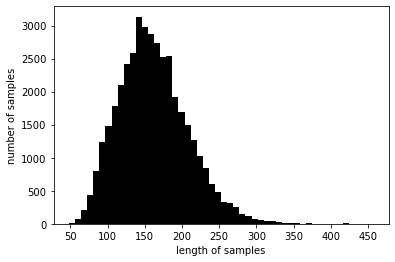

In [37]:
print('문장 최대 길이 :',max(len(l) for l in X_data))
print('문장의 평균 길이 :',sum(map(len, X_data))/len(X_data))
plt.hist([len(s) for s in X_data], bins=50, color='k')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()
plt.close()

In [38]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

max_len = 250
below_threshold_len(max_len, X_data)

전체 샘플 중 길이가 250 이하인 샘플의 비율: 96.10491674443735


## padding

In [39]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_data = pad_sequences(X_data, maxlen = max_len)

In [40]:
X_data[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,  101,    1,    3,   16,
          5,   28,   15, 1536, 1829,  717,  272,   17,   30,    3,    2,
          1, 2856, 2906,    3,   51,   40,  286,  370,   12,  566,   30,
         51,   77,   12,    2,    1,  166,  149,  472,  518, 2291,   58,
         30,   41,  102,   51,  426,   31,  272,   54,  472,  591,  393,
        211,   77,   12,    2,    1,  403,   55,   

# 6. LSTM 돌리기 

In [43]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [45]:
X=X_data
X[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,  101,    1,    3,   16,
          5,   28,   15, 1536, 1829,  717,  272,   17,   30,    3,    2,
          1, 2856, 2906,    3,   51,   40,  286,  370,   12,  566,   30,
         51,   77,   12,    2,    1,  166,  149,  472,  518, 2291,   58,
         30,   41,  102,   51,  426,   31,  272,   54,  472,  591,  393,
        211,   77,   12,    2,    1,  403,   55,   

In [62]:
type(X)

numpy.ndarray

In [68]:
y = trainset.id.tolist()
y[0:5]

['SW', 'SK', 'CT', 'SE', 'CT']

In [69]:
print(len(X),len(y))

40718 40718


In [70]:
from sklearn.preprocessing import LabelEncoder

In [75]:
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

In [77]:
y = to_categorical(y)

In [79]:
y.shape

(40718, 13)

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=777, stratify=y)
x_train.shape

(28502, 250)

In [80]:
model = Sequential()
model.add(Embedding(vocab_size, max_len))
model.add(LSTM(128))
model.add(Dense(13, activation='softmax'))

model.summary()

2021-09-15 16:41:32.220263: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-15 16:41:32.221223: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-15 16:41:32.224971: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 250)         1652000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               194048    
_________________________________________________________________
dense (Dense)                (None, 13)                1677      
Total params: 1,847,725
Trainable params: 1,847,725
Non-trainable params: 0
_________________________________________________________________


In [82]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)
mc = ModelCheckpoint('category_model2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [83]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, callbacks=[es, mc], batch_size=32, validation_split=0.2)

loaded_model = load_model('category_model2.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

2021-09-15 16:41:47.313167: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-15 16:41:47.337323: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2095364999 Hz


Epoch 1/10
713/713 [==============================] - 638s 890ms/step - loss: 1.0987 - acc: 0.6455 - val_loss: 0.1076 - val_acc: 0.9665

Epoch 00001: val_acc improved from -inf to 0.96650, saving model to category_model2.h5
Epoch 2/10
713/713 [==============================] - 656s 920ms/step - loss: 0.0825 - acc: 0.9768 - val_loss: 0.0620 - val_acc: 0.9812

Epoch 00002: val_acc improved from 0.96650 to 0.98123, saving model to category_model2.h5
Epoch 3/10
713/713 [==============================] - 630s 883ms/step - loss: 0.0477 - acc: 0.9880 - val_loss: 0.0350 - val_acc: 0.9912

Epoch 00003: val_acc improved from 0.98123 to 0.99123, saving model to category_model2.h5
Epoch 4/10
713/713 [==============================] - 660s 926ms/step - loss: 0.0210 - acc: 0.9944 - val_loss: 0.0370 - val_acc: 0.9897

Epoch 00004: val_acc did not improve from 0.99123
Epoch 5/10
713/713 [==============================] - 661s 928ms/step - loss: 0.0564 - acc: 0.9855 - val_loss: 0.0224 - val_acc: 0.9946

Cannot convert a symbolic Tensor -> numpy 버전 1.19.5로 바꿔줌

https://wikidocs.net/45101

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


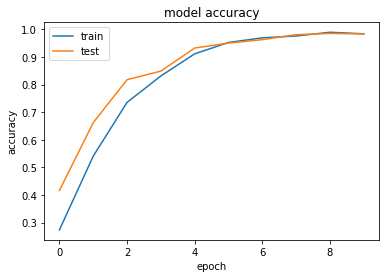

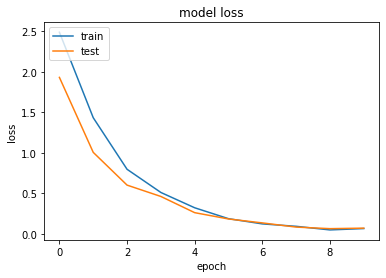

In [49]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()